In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [4]:
# copy demo into current directory
ac.copydemo('brf')

# start AUTO with runner object
runner = ra.runAUTO()

pgm = "brf"
print("\nDemo %s is started"%pgm)
print("\n%s : first run : stationary solutions"%pgm)
r1 = ac.run(e=pgm,c=pgm,runner=runner)

print("\n%s : second run : periodic solutions"%pgm)
r2 = ac.run(r1("HB1"),IPS=2,ICP=[5,11],NMX=120,EPSL=1e-08,runner=runner)

print("\n%s : third run : secondary periodic solutions"%pgm)
r3 = ac.run(r2("BP1"),ISW=-1,NMX=100,EPSL=1e-07,runner=runner)

ac.save(r1+r2+r3,pgm)

Copying demo brf ... done

Demo brf is started

brf : first run : stationary solutions
gfortran -fopenmp -O -c brf.f90 -o brf.o
gfortran -fopenmp -O brf.o -o brf.exe /auto/lib/*.o
Starting brf ...

  BR    PT  TY  LAB    PAR(5)        L2-NORM         U(1)          U(2)          U(3)          U(4)          U(5)          U(6)     
   1     1  EP    1   4.00000E-01   7.55831E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.72500E+00
   1     5  HB    2   5.12990E-01   7.55831E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.72500E+00
   1    11  HB    3   1.02338E+00   7.55831E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.72500E+00
   1    16  HB    4   1.51789E+00   7.55831E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.72500E+00
   1    21  HB    5   1.95959E+00   7.55831E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.00000E+00   2.72500E+00
   1    2

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB    PAR(5)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      MAX U(5)       PERIOD    
   2    88  BP    7   1.23526E+00   8.15112E+00   2.58250E+00   3.37018E+00   3.94858E+00   3.37018E+00   2.58250E+00   3.48116E+00
   2   114  TR    8   1.89686E+00   7.96767E+00   2.35131E+00   2.99477E+00   3.78575E+00   2.99477E+00   2.35131E+00   3.40535E+00
   2   116  TR    9   1.94124E+00   7.95113E+00   2.33646E+00   2.96170E+00   3.76739E+00   2.96170E+00   2.33646E+00   3.39550E+00
   2   119  UZ   10   2.05000E+00   7.90627E+00   2.29972E+00   2.86009E+00   3.68860E+00   2.86009E+00   2.29972E+00   3.36716E+00

 Total Time    0.388E+00
brf ... done

brf : third run : secondary periodic solutions
Starting brf ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB    PAR(5)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      MAX U(5)       PERIOD    
   3    56  TR   11   1.40184E+00   8.01933E+00   2.24903E+00   2.53578E+00   3.23921E+00   3.80294E+00   2.99481E+00   3.41871E+00
   3    80  TR   12   1.80834E+00   7.91323E+00   2.05039E+00   2.13873E+00   2.48085E+00   3.59564E+00   3.42628E+00   3.44551E+00
   3    85  UZ   13   2.05000E+00   7.91873E+00   2.02190E+00   2.07815E+00   2.33600E+00   3.59456E+00   3.55841E+00   3.49875E+00

 Total Time    0.591E+00
brf ... done
Saving to b.brf, s.brf, and d.brf ... done


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Created plot


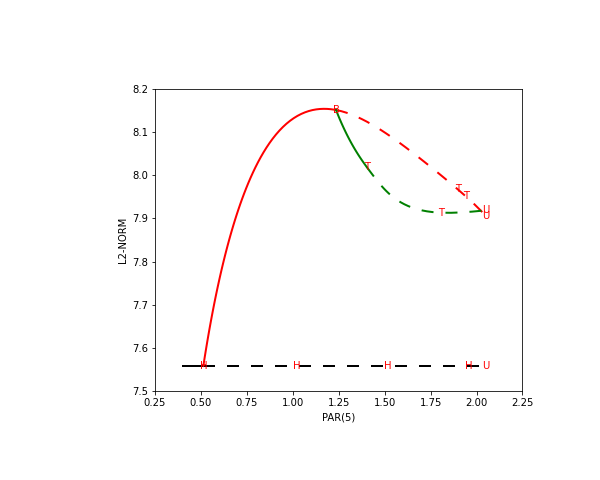

Created plot


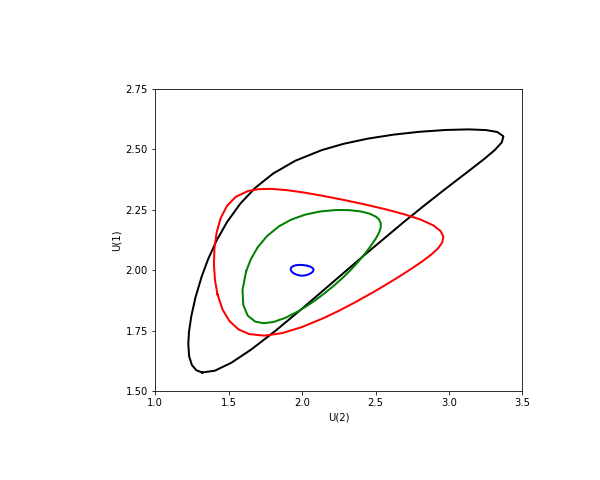

In [5]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('brf')
p.config(stability=True, grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

# plot solutions
p = ac.plot('brf')
p.config(type='solution')
p.config(solution_x="U(2)", solution_y="U(1)")
p.config(label=[7,9,11,13])
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [6]:
# clean up files

ac.delete('brf')
ac.clean()

Deleting b.brf ... done
Deleting s.brf ... done
Deleting d.brf ... done
Deleting fort.* *.o *.exe *.*~ ... done
